In [27]:
import os
import sys

# os.chdir('../')
# sys.path.append(os.getcwd())

import pandas as pd
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from utils.clustering_utils import seqs2hamming

In [2]:
from tqdm import trange

In [3]:
alpha_cm = pd.read_csv('data/significant_clone_matrix_fisher_fmba_TRA_top_500k_wo_leaks.csv').drop(columns=['Unnamed: 0'])

In [4]:
beta_cm = pd.read_csv('data/significant_clone_matrix_fisher_fmba_TRB_top_500k_wo_leaks.csv').drop(columns=['Unnamed: 0'])

In [5]:
beta_run_to_num_of_clones = pd.read_csv('data/run_to_number_of_clones_fmba_TRB.csv')
alpha_run_to_num_of_clones = pd.read_csv('data/run_to_number_of_clones_fmba_TRA.csv')

In [6]:
covid_clones_beta = beta_cm.columns[1:]
res_beta = seqs2hamming(covid_clones_beta, viz_method='graphopt')

In [7]:
covid_clones_alpha = alpha_cm.columns[1:]
res_alpha = seqs2hamming(covid_clones_alpha, viz_method='graphopt')

In [8]:
res_alpha

,cdr3,cluster,x,y,cluster_size,x_mean,y_mean
0,CAAADFNKFYF,0,127.630956,-27.174839,460,-15.367678,45.699516
1,CAAANFNKFYF,0,31.738866,-133.567134,460,-15.367678,45.699516
2,CAADDFNKFYF,0,-101.496657,50.853436,460,-15.367678,45.699516
3,CAAGDFNKFYF,0,-30.160335,-40.318208,460,-15.367678,45.699516
4,CAAKDFNKFYF,0,-40.259894,70.443192,460,-15.367678,45.699516
...,...,...,...,...,...,...,...
4392,CVVSDLMEYGNKLVF,111,335.586590,114.216363,2,157.713351,46.995530
4393,CVVSDRMEYGNKLVF,111,-20.159888,-20.225304,2,157.713351,46.995530
4394,CVVSEPSGGYQKVTF,112,350.787198,-601.310451,1,350.787198,-601.310451
4395,CVVSGYGAAGNKLTF,113,70.526704,30.213067,1,70.526704,30.213067


In [9]:
alpha_cm

,run,CAAADFNKFYF,CAAADNFNKFYF,CAAAEYNFNKFYF,CAAAFNKFYF,CAAAKYNFNKFYF,CAAALYNFNKFYF,CAAANFNKFYF,CAAANNFNKFYF,CAAAPYNFNKFYF,...,CVVYNFNKFYF,CVYNFNKFYF,CYNFNKFYF,FYNFNKFYF,LYNFNKFYF,SDNFNKFYF,SYNFNKFYF,WYNFNKFYF,YALSSGSARQLTF,YYNFNKFYF
0,330000390808_S24_L001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,250002590808_S99_L002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,050002290808_S117_L002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
3,500003950808_S31_L001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,500003530808_S38_L001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,p17_55-2_DNA_S13_L001,2,0,1,0,0,5,2,2,2,...,8,1,2,2,2,1,2,2,1,2
1269,p17_2_DNA_S18_L001,0,3,0,1,3,4,7,0,0,...,4,1,1,0,0,0,0,1,2,0
1270,p17_77-1_DNA_S4_L001,0,0,0,0,0,2,2,0,0,...,1,1,0,0,0,0,0,0,1,0
1271,p17_62_DNA_S74_L001,0,2,0,0,1,1,3,2,1,...,0,1,0,0,0,0,0,0,2,0


In [10]:
corr_coeffs = []
corr_pvals = []

In [11]:
values = {}

In [12]:
for a in trange(res_alpha.cluster.max() + 1):
    coeffs_for_cur_alpha = []
    pvals_for_cur_alpha = []
    alpha_cluster_clones = res_alpha[res_alpha.cluster == a].cdr3
    alpha_usages = pd.DataFrame(data={'alpha': alpha_cm[alpha_cluster_clones].sum(axis=1), 
                                      'run': alpha_cm.run})
    for b in range(res_beta.cluster.max() + 1):
        beta_cluster_clones = res_beta[res_beta.cluster == b].cdr3
        beta_usages = pd.DataFrame(data={'beta': beta_cm[beta_cluster_clones].sum(axis=1), 
                                      'run': beta_cm.run})
        merged_data = alpha_usages.merge(beta_usages)
        r, pval = spearmanr(merged_data.alpha, merged_data.beta)
        values[a, b] = [merged_data.alpha, merged_data.beta]
        coeffs_for_cur_alpha.append(r)
        pvals_for_cur_alpha.append(pval)
    corr_coeffs.append(coeffs_for_cur_alpha)
    corr_pvals.append(pvals_for_cur_alpha)

100%|██████████| 115/115 [00:26<00:00,  4.36it/s]


In [13]:
corr_coeffs[5][22]

0.05669680744392664

<AxesSubplot:xlabel='alpha', ylabel='beta'>

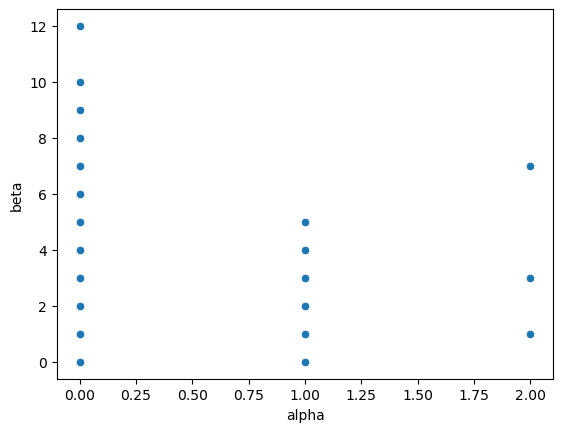

In [14]:
sns.scatterplot(pd.DataFrame(values[5, 22]).T, x='alpha', y='beta')

<AxesSubplot:>

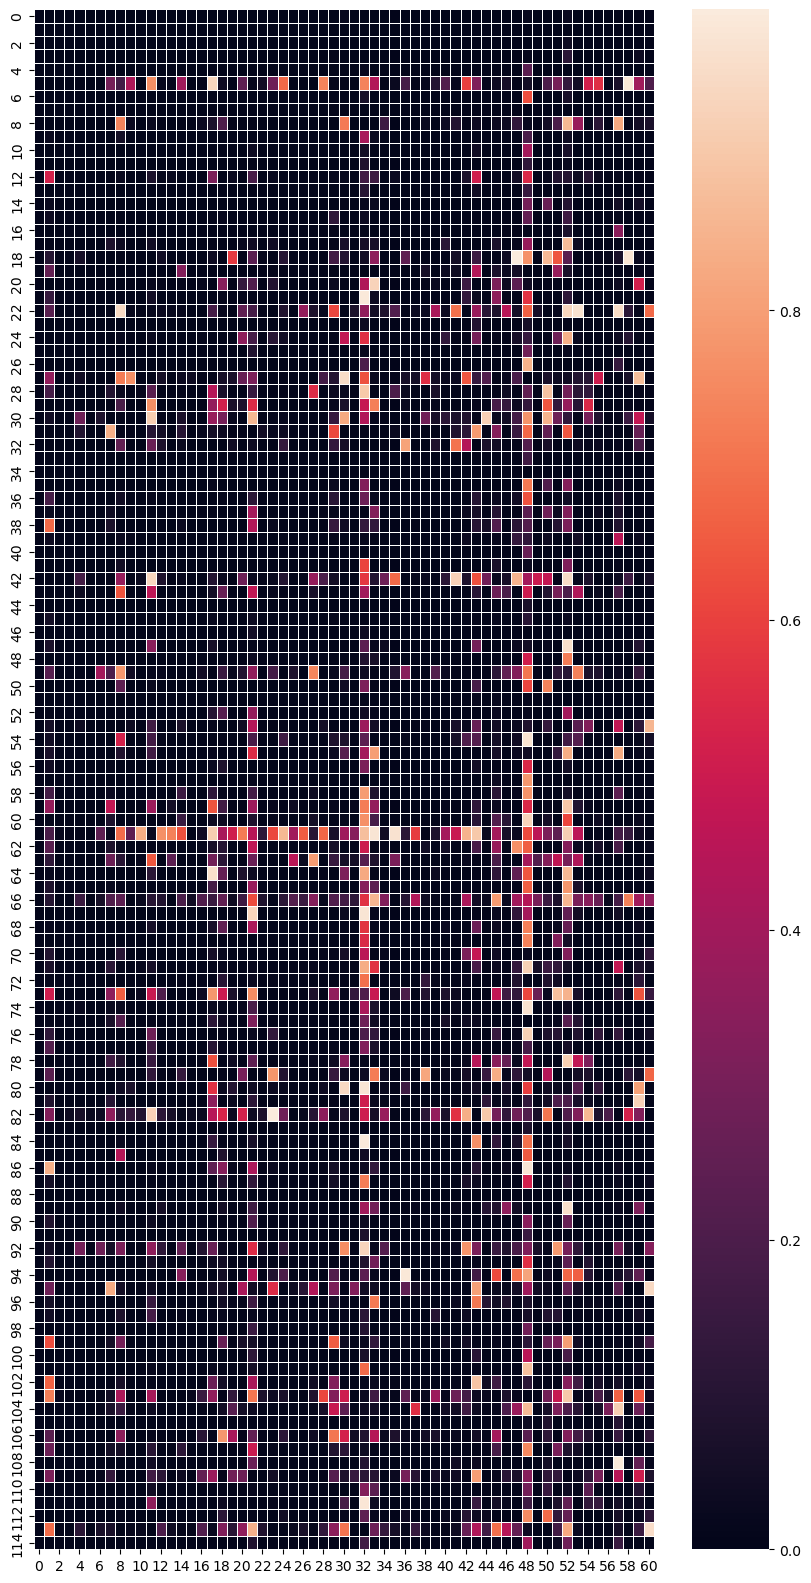

In [15]:
fig, ax = plt.subplots(figsize=(10,20))         
sns.heatmap(corr_pvals, linewidth=0.5, ax=ax)

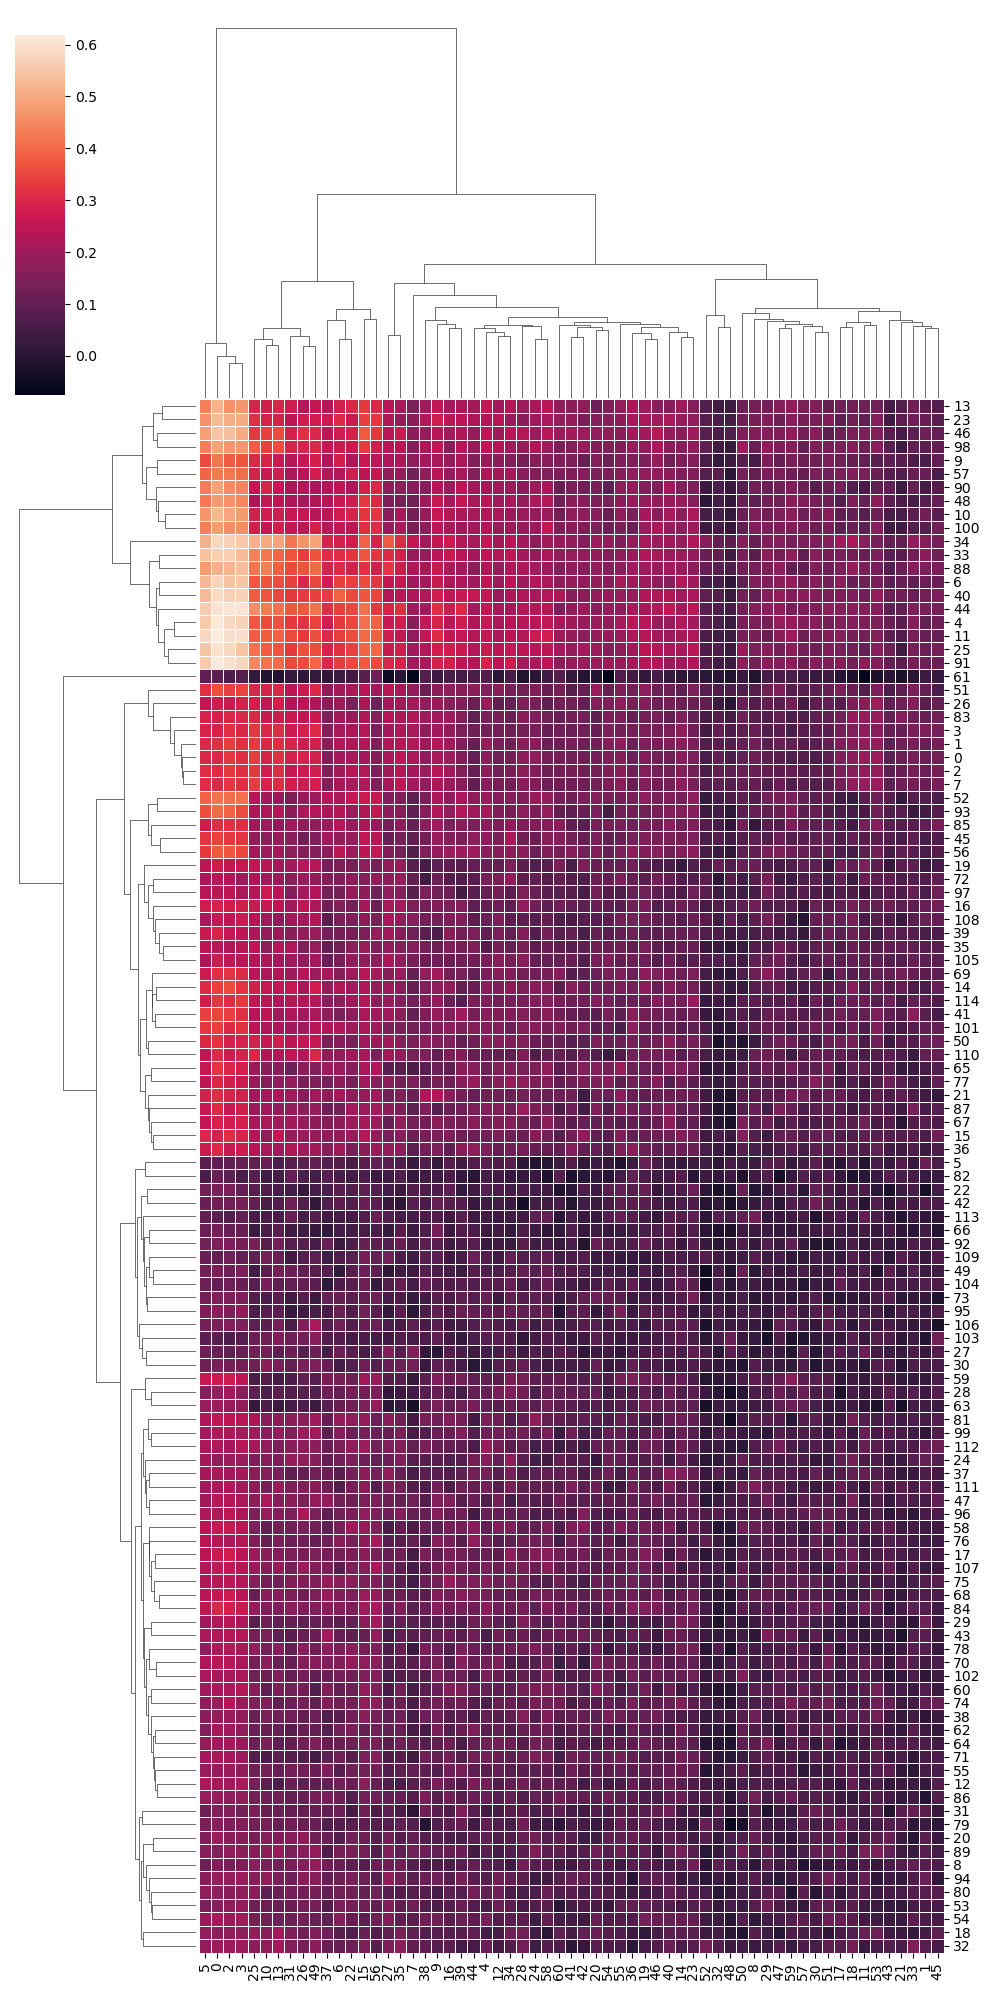

In [16]:
sns.clustermap(corr_coeffs, linewidth=0.5, figsize=(10,20), yticklabels=True, xticklabels=True)
plt.savefig('figures/cluster_correlation_clustermap.png')
plt.savefig('figures/cluster_correlation_clustermap.svg')
plt.savefig('figures/cluster_correlation_clustermap.pdf')

In [17]:
pd.DataFrame(corr_coeffs).to_csv('data/cluster_correlations.csv', index=False)

In [21]:
odds = [[0 for j in range(res_beta.cluster.max() + 1)] for i in range(res_alpha.cluster.max() + 1)]
for a in trange(res_alpha.cluster.max() + 1):
    alpha_cluster_clones = res_alpha[res_alpha.cluster == a].cdr3
    alpha_usages = pd.DataFrame(data={'alpha': alpha_cm[alpha_cluster_clones].sum(axis=1), 
                                      'run': alpha_cm.run})
    
    for b in range(res_beta.cluster.max() + 1):
        beta_cluster_clones = res_beta[res_beta.cluster == b].cdr3
        beta_usages = pd.DataFrame(data={'beta': beta_cm[beta_cluster_clones].sum(axis=1), 
                                      'run': beta_cm.run})
        merged_data = alpha_usages.merge(beta_usages)
        merged_data['joint_clones'] = merged_data.apply(lambda x: min(x.alpha, x.beta), axis=1)
        odds[a][b] = merged_data['joint_clones'].sum() * len(merged_data) / merged_data.alpha.sum() / merged_data.beta.sum()

100%|██████████| 115/115 [02:31<00:00,  1.32s/it]


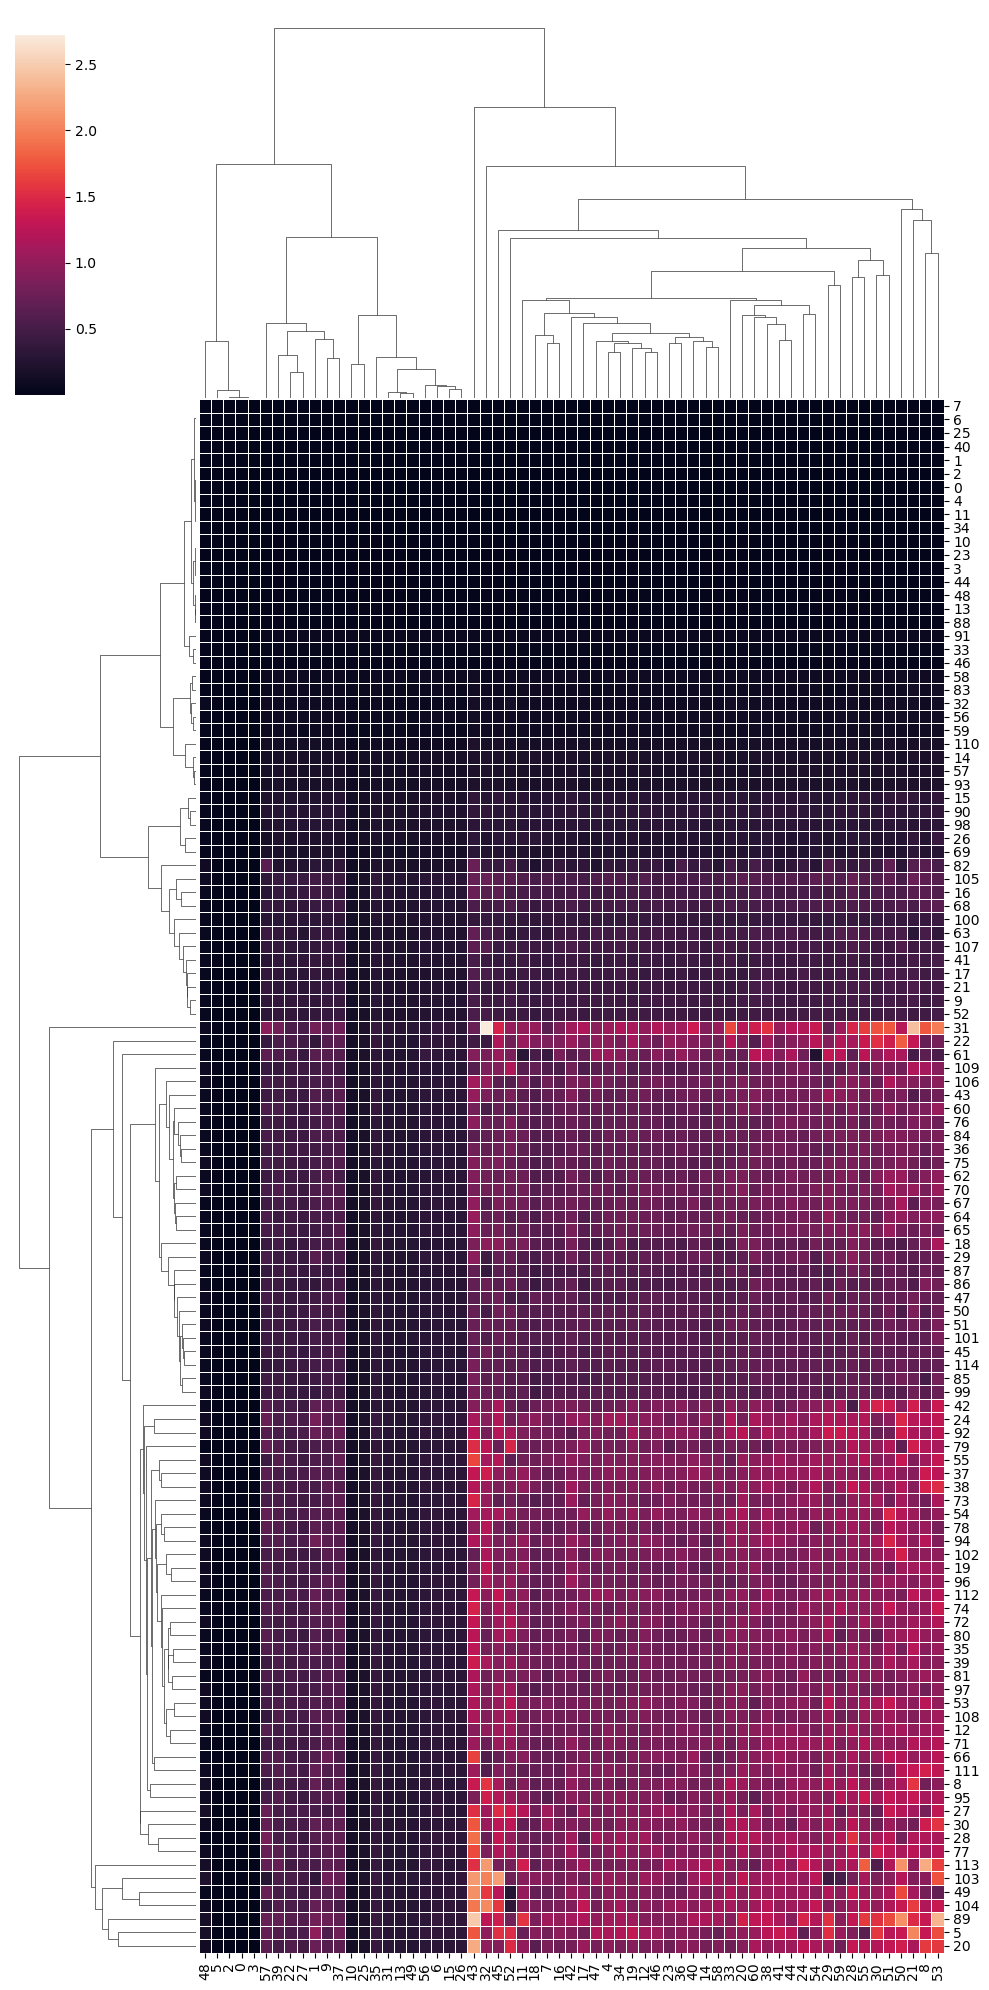

In [23]:
sns.clustermap(odds, linewidth=0.5, figsize=(10,20), yticklabels=True, xticklabels=True)

In [28]:
np.array(odds).flatten()

array([0.00161004, 0.00189575, 0.00163836, ..., 0.64604222, 0.66870629,
       0.7012987 ])

In [29]:
np.array(corr_coeffs).flatten()

array([0.3031276 , 0.11983096, 0.32706148, ..., 0.16202533, 0.09053542,
       0.13719387])

In [30]:
pearsonr(np.array(odds).flatten(), np.array(corr_coeffs).flatten())

(-0.5065549371727004, 0.0)

Text(0, 0.5, 'pearson')

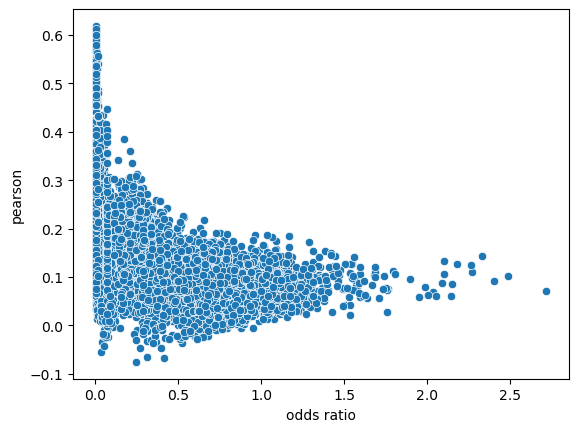

In [33]:
sns.scatterplot(x=np.array(odds).flatten(), y=np.array(corr_coeffs).flatten())
plt.xlabel('odds ratio')
plt.ylabel('pearson')

In [36]:
pd.DataFrame(odds).to_csv('data/cluster_odds_ratio.csv', index=False)